# Chronic Kidney Disease
## A Tale of Two Cities

According to the National Kidney Foundation, 30 million Americans suffer from chronic kidney disease (CKD), a life-threatening disease that impairs the kidneys’ ability to remove waste products from the body, maintain a proper balance of bodily fluids and chemicals, regulate blood pressure, produce vitamin D, and control the production of red blood cells [[1](https://www.kidney.org/atoz/content/about-chronic-kidney-disease)]. Although CKD can be prevented and easily managed if caught in the early stages, it is often the case that it goes unchecked until the disease has progressed to more advanced stages. Recent estimates put the annual cost of treating kidney failure at $31 billion with 89,000 deaths per year [[2](https://www.kidney.org/news/newsroom/factsheets/End-Stage-Renal-Disease-in-the-US)]. Early detection of CKD can help save money, save lives, and improve the livelihood and productivity of millions of Americans. 

Using Census and CDC data, we may be able to better identify neighborhoods where aggressive public health campaigns and healthcare initiatives can positively affect the early detection and treatment of CKD. To highlight this, let’s first look at national trends and correlations and then bring it to a more local level by comparing two similar, yet disparate cities in northern Indiana. To simplify, we will hypothesize that differences in age, sex, income levels, rates of other chronic diseases, and prevention measures are correlated with rates of CKD. 


### Import the Data

In [1]:
# import standard libraries
import pandas as pd
import numpy as np
import requests
from scipy import stats

# import plotting libraries
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
import folium
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# set display options
# change these to view more or all rows/columns,
# but it will slow down performance
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', 50)

In [3]:
# import the tidy dataframe
df = pd.read_csv('data/all_data_tidy.csv', index_col=0)
df.head(3)

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,TractID,StateAbbr,CityName,GeoLocation,Category,MeasureId,Measure,PopulationCount,Data_Value
0,1073000100,AL,Birmingham,"(33.5794328326, -86.7228323926)",Prevention,ACCESS2,Current lack of health insurance among adults ...,3042.0,23.9
1,1073000300,AL,Birmingham,"(33.5428208686, -86.752433978)",Prevention,ACCESS2,Current lack of health insurance among adults ...,2735.0,28.8
2,1073000400,AL,Birmingham,"(33.5632449633, -86.7640474064)",Prevention,ACCESS2,Current lack of health insurance among adults ...,3338.0,26.1


In [4]:
# import the wide dataframe
pivot_df = pd.read_csv('data/all_data_wide.csv', index_col=0)
pivot_df.head(3)

,TractID,All teeth lost among adults aged >=65 Years,Arthritis among adults,Binge drinking among adults,Cancer (excluding skin cancer) among adults,Cholesterol screening among adults,Chronic kidney disease among adults,Chronic obstructive pulmonary disease among adults,Coronary heart disease among adults,Current asthma among adults,Current lack of health insurance among adults aged 18–64 Years,Current smoking among adults,Diagnosed diabetes among adults,Divorced | Population 15 years and over,Employment/Population Ratio | Population 16 years and over,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 Years","Female householder, no husband present, family household | FAMILIES | Total families",Female | 10-14 years,Female | 15-19 years,Female | 20-24 years,Female | 25-29 years,Female | 30-34 years,Female | 35-39 years,Female | 40-44 years,Female | 45-49 years,...,"Percent | Population 25 years and over | 9th-12th grade, no diploma",Percent | Population 25 years and over | Associate's degree,Percent | Population 25 years and over | Bachelor's degree,Percent | Population 25 years and over | Graduate or professional degree,Percent | Population 25 years and over | High school graduate (includes equivalency),Percent | Population 25 years and over | Less than 9th grade,"Percent | Population 25 years and over | Some college, no degree",Physical health not good for >=14 days among adults,Renter-occupied housing units | Occupied housing units,Separated | Population 15 years and over,Sleeping less than 7 hours among adults,Stroke among adults,Taking medicine for high blood pressure control among adults with high blood pressure,Total | FAMILIES | Average family size,Total | HOUSING TENURE | Owner-occupied housing units,Total | HOUSING TENURE | Renter-occupied housing units,Total | UNMARRIED-PARTNER HOUSEHOLDS | Opposite sex,Total | UNMARRIED-PARTNER HOUSEHOLDS | Same sex,Unemployment rate | Population 16 years and over,Visits-dentist or dental clinic among adults,Visits-doctor for routine checkup within the past Year among adults,StateAbbr,CityName,GeoLocation,PopulationCount
0,1073000100,30.2,32.5,10.1,5.2,72.3,3.6,11.0,8.0,12.7,23.9,30.6,17.8,22.8,52.2,54.2,302.0,7.0,5.9,0.2,8.1,14.4,6.6,3.4,4.7,...,13.2,8.3,6.1,3.2,34.1,6.3,28.8,19.6,673.0,2.9,50.4,5.5,80.0,3.50,46.5,53.5,2.1,0.0,15.9,40.9,76.3,AL,Birmingham,"(33.5794328326, -86.7228323926)",3042.0
1,1073000300,33.3,31.3,10.8,4.6,69.8,3.8,10.7,8.2,11.8,28.8,30.2,19.2,16.8,53.5,51.3,295.0,0.7,4.2,9.8,8.7,12.3,6.9,6.9,7.9,...,19.3,6.6,8.3,4.3,40.5,2.2,18.7,20.2,688.0,6.1,49.4,5.7,80.3,3.51,24.9,75.1,4.3,0.8,13.6,39.0,73.8,AL,Birmingham,"(33.5428208686, -86.752433978)",2735.0
2,1073000400,36.0,34.6,9.5,5.2,72.0,4.0,11.7,8.8,13.0,26.1,31.5,21.0,16.7,44.1,52.1,460.0,1.6,6.4,5.5,11.3,8.9,2.4,4.7,4.5,...,15.6,4.2,2.8,1.3,47.0,5.6,23.5,21.1,545.0,5.5,52.5,6.5,82.0,3.56,52.0,48.0,10.1,0.0,13.6,35.1,77.5,AL,Birmingham,"(33.5632449633, -86.7640474064)",3338.0


In [5]:
# import ACS variables as dataframe: acs_vars
acs_vars = pd.read_csv('data/acs_variables.csv', index_col=0)

# import full ACS dataset as dataframe: acs_df
acs_df = pd.read_csv('data/acs_data_clean.csv', index_col=0)

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Plotting Distributions

Text(0.5,0,'Number of People with Chronic Kidney Disease  per 100 (%)')

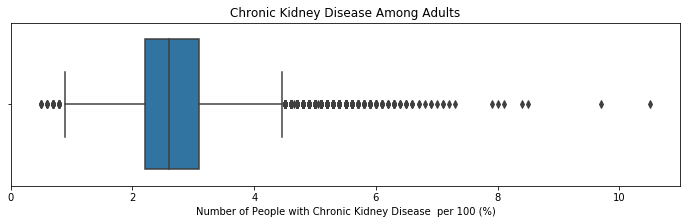

In [6]:
# plot the distribution spread of Chronic Kidney Disease Rates
plt.figure(figsize=(12,3))
sns.boxplot(x=pivot_df['Chronic kidney disease among adults'])
plt.title('Chronic Kidney Disease Among Adults')
plt.xlabel('Number of People with Chronic Kidney Disease  per 100 (%)')

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


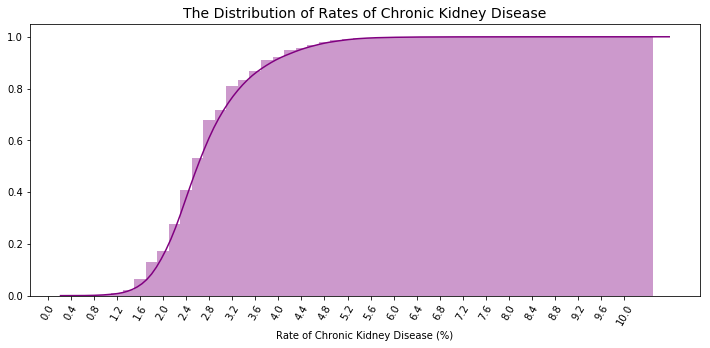

In [7]:
# plot the distribution chronic kidney disease
plt.figure(figsize=(12,5))
sns.distplot(pivot_df['Chronic kidney disease among adults'], color='purple', hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

# plot the mean chronic kidney disease rate
#plt.vlines(x=pivot_df['Chronic kidney disease among adults'].mean(), ymin=0, ymax=0.76, 
#           linestyle='dashed', color='red')
plt.title('The Distribution of Rates of Chronic Kidney Disease', fontsize=14)
plt.xlabel('Rate of Chronic Kidney Disease (%)')
plt.xticks(np.arange(0, 10.3, step=0.4), rotation=60)
plt.savefig('img/ckd_distribution.png')

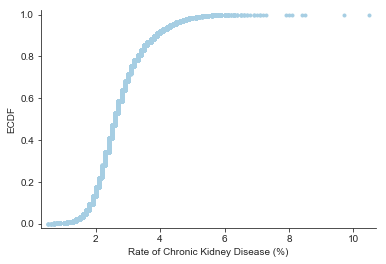

In [32]:
x = np.sort(pivot_df['Chronic kidney disease among adults'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Rate of Chronic Kidney Disease (%)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


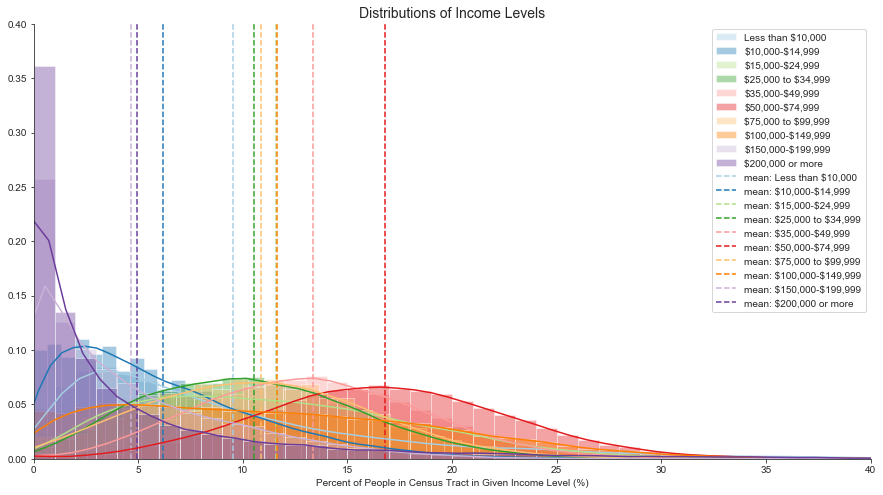

In [12]:
# plot the distribution of income levels
sns.set_style('ticks', {'axes.spines.top': False, 'axes.spines.right': False})
plt.figure(figsize=(15,8))
sns.set_palette("Paired", 10)
color = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
         '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
for i, col in enumerate(list(kidney_income.columns)[1:]):
    sns.distplot(kidney_income[col].fillna(0), label=col, bins=100)
    
    # plot the mean percent of the population from each income level
    plt.vlines(x=kidney_income[col].mean(), ymin=0, ymax=0.4, linestyle='dashed', color=color[i], label='mean: '+ col)
plt.legend()
plt.title('Distributions of Income Levels', fontsize=14)
plt.xlim(0,40)
plt.ylim(0,0.4)
plt.xlabel('Percent of People in Census Tract in Given Income Level (%)')
plt.savefig('img/income_distribution.png')

### Plotting Correlations

In [8]:
# create a dataframe from kidney disease and income level data: kidney_income
kidney_income = pivot_df[['Chronic kidney disease among adults','Households | Less than $10,000', 
          'Households | $10,000-$14,999', 'Households | $15,000-$24,999', 
          'Households | $25,000-$34,999', 'Households | $35,000-$49,999', 
          'Households | $50,000-$74,999', 'Households | $75,000-$99,999', 
          'Households | $100,000-$149,999', 'Households | $150,000-$199,999', 
          'Households | $200,000 or more']]
kidney_income.columns = ['Chronic kidney disease among adults', 'Less than $10,000', '\$10,000-$14,999',
                      '\$15,000-$24,999', '\$25,000 to $34,999', '\$35,000-$49,999', '\$50,000-$74,999',
                      '\$75,000 to $99,999', '\$100,000-$149,999', '\$150,000-$199,999', '$200,000 or more']

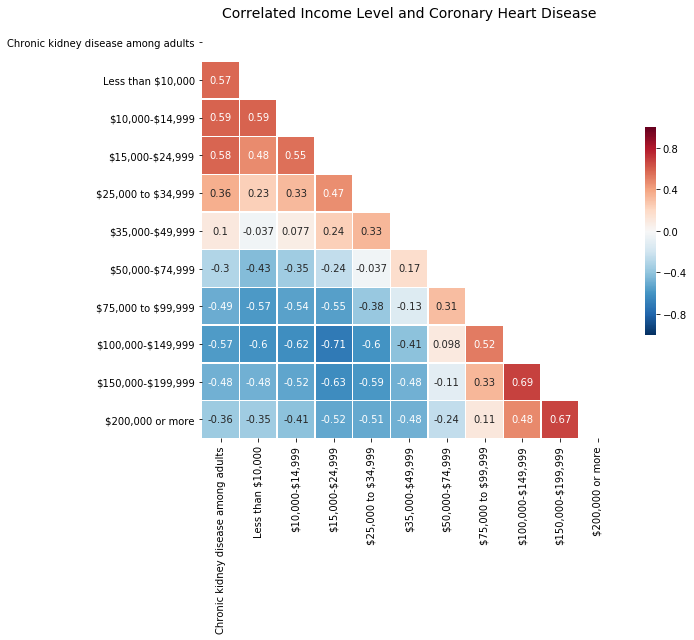

In [9]:
# create the correlation map dataframe
corr = kidney_income.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmin=-1.0, vmax=1.0, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlated Income Level and Coronary Heart Disease', fontsize=14)
plt.tight_layout()
plt.savefig('img/corr_income.png')

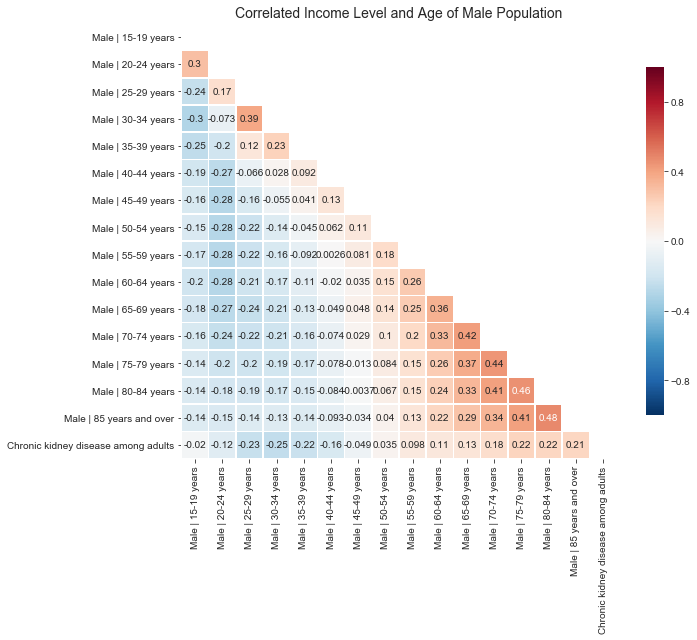

In [14]:
# create a correlation heatmap for males comparing kidney disease and age
# create list of age groupings
age_sex = list(acs_vars[acs_vars.Category == 'AGE AND SEX']['Measure'])

# create a list of columns from age_sex
cols = [cat for cat in age_sex if ('Male' in cat) 
        and ('Under 5' not in cat) 
        and ('5-9' not in cat)
        and ('10-14' not in cat)
       ]
cols.append('Chronic kidney disease among adults')

# slice the dataframe
kidney_male = pivot_df[cols]

# create a correlation map dataframe
corr = kidney_male.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmin=-1.0, vmax=1.0, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlated Income Level and Age of Male Population', fontsize=14)
plt.tight_layout()
plt.savefig('img/corr_male.png')

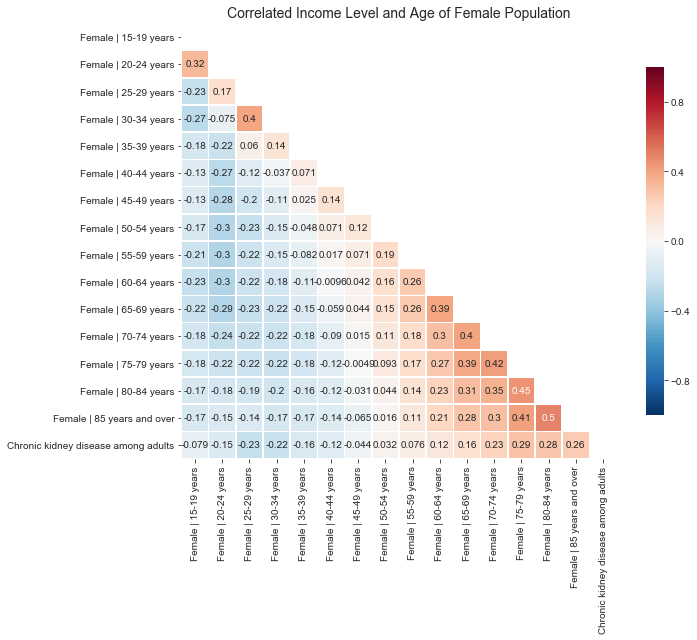

In [15]:
# create a correlation heatmap for females comparing kidney disease and age
# create a list of columns from age_sex
cols = [cat for cat in age_sex if ('Female' in cat) 
        and ('Under 5' not in cat) 
        and ('5-9' not in cat)
        and ('10-14' not in cat)
       ]
cols.append('Chronic kidney disease among adults')

# slice the dataframe
kidney_male = pivot_df[cols]

# create a correlation map dataframe
corr = kidney_male.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmin=-1.0, vmax=1.0, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlated Income Level and Age of Female Population', fontsize=14)
plt.tight_layout()
plt.savefig('img/corr_female.png')

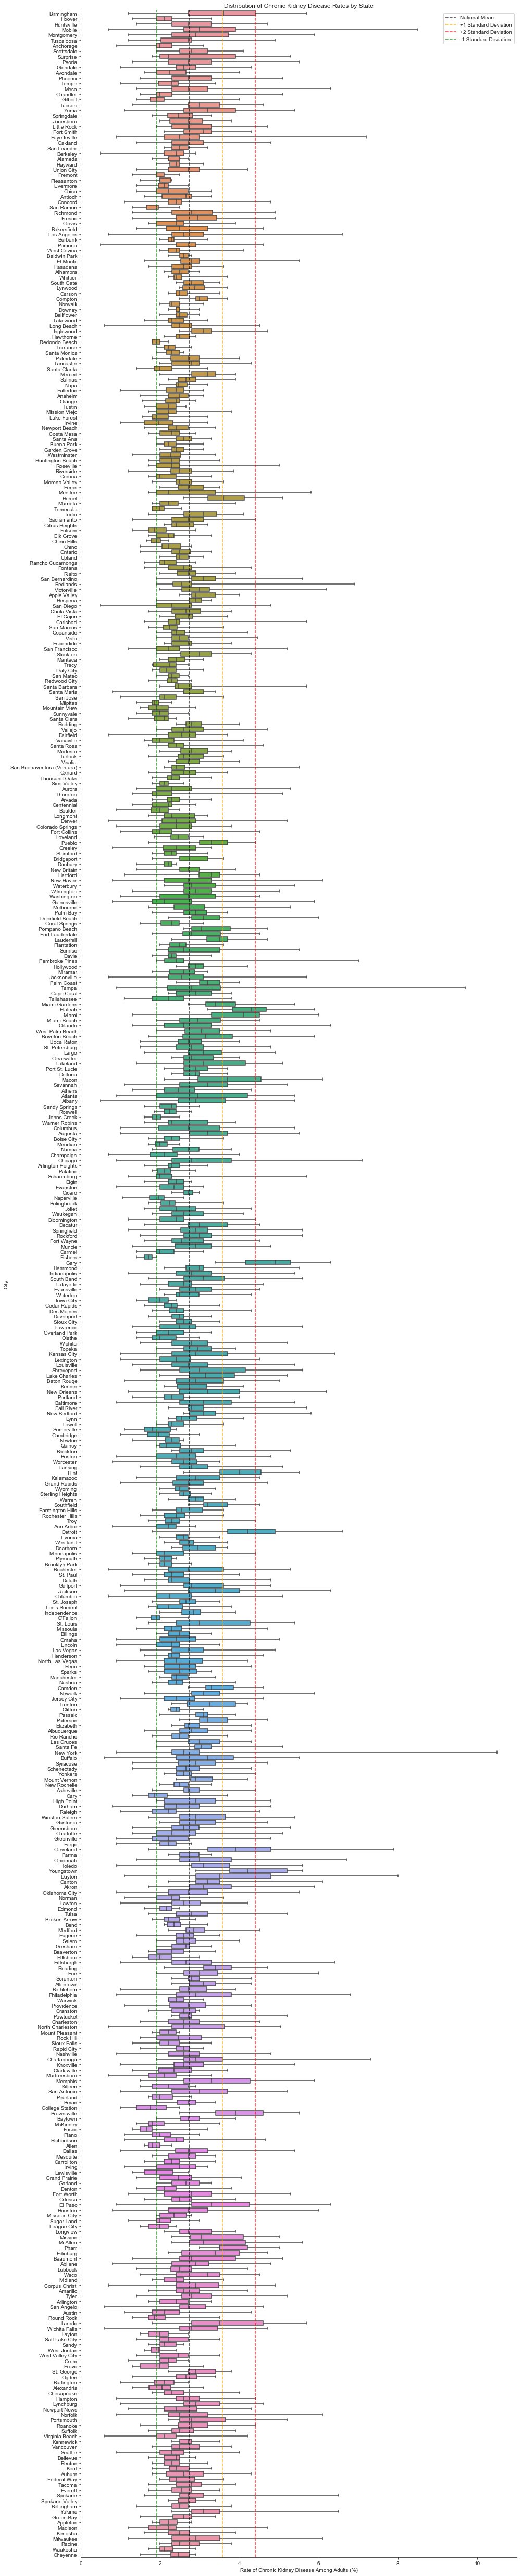

In [16]:
# plot the distribution spread of kidney disease in each city
plt.figure(figsize=(15,90))
sns.boxplot(y='CityName', x='Chronic kidney disease among adults', data=pivot_df, whis=np.inf)

# plot the national mean
plt.axvline(x=pivot_df['Chronic kidney disease among adults'].mean(), 
            linestyle='dashed', color='k', **{'alpha':0.8,'label':'National Mean'})

# plot one standard deviation above the mean
plt.axvline(x=pivot_df['Chronic kidney disease among adults'].mean() 
            + pivot_df['Chronic kidney disease among adults'].std(), 
            linestyle='dashed', color='orange', **{'alpha':0.8,'label':'+1 Standard Deviation'})

# plot two standard deviations above the mean
plt.axvline(x=pivot_df['Chronic kidney disease among adults'].mean() 
            + 2 * pivot_df['Chronic kidney disease among adults'].std(), 
            linestyle='dashed', color='r', **{'alpha':0.8,'label':'+2 Standard Deviation'})

# plot one standard deviation below the mean
plt.axvline(x=pivot_df['Chronic kidney disease among adults'].mean()
            - pivot_df['Chronic kidney disease among adults'].std(), 
            linestyle='dashed', color='g', **{'alpha':0.8,'label':'-1 Standard Deviation'})
plt.ylabel('City')
plt.xlabel('Rate of Chronic Kidney Disease Among Adults (%)')
plt.title('Distribution of Chronic Kidney Disease Rates by State')
plt.legend()

In [ ]:
df.Category.unique()

In [ ]:
# slice the df category to only include prevention measures and CKD
prev_cat = df[(df['Category'] == 'Prevention') & (df['MeasureId'] != 'DENTAL') | (df['MeasureId'] == 'KIDNEY')]
prev_cat_df = pd.pivot_table(prev_cat, index='TractID', columns='MeasureId', values='Data_Value')


In [17]:
# create a list of CDC categories: cats
cats = ['Prevention', 'Unhealthy Behaviors', 'Health Outcomes']

# slice the df category to only include columns in cats
prev_cat = df[(df['Category'].isin(cats))]
prev_cat_df = pd.pivot_table(prev_cat, index='TractID', columns='MeasureId', values='Data_Value')
prev_cat_df.head()

MeasureId,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,CHD,CHECKUP,CHOLSCREEN,COLON_SCREEN,COPD,COREM,COREW,CSMOKING,DENTAL,DIABETES,HIGHCHOL,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PAPTEST,PHLTH,SLEEP,STROKE,TEETHLOST
TractID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1073000100,23.9,32.5,10.1,46.2,80.0,5.2,12.7,8.0,76.3,72.3,54.2,11.0,28.2,25.2,30.6,40.9,17.8,40.4,3.6,42.3,74.2,18.8,46.7,76.0,19.6,50.4,5.5,30.2
1073000300,28.8,31.3,10.8,45.6,80.3,4.6,11.8,8.2,73.8,69.8,51.3,10.7,25.7,22.7,30.2,39.0,19.2,41.5,3.8,43.7,74.0,18.5,47.0,73.2,20.2,49.4,5.7,33.3
1073000400,26.1,34.6,9.5,50.1,82.0,5.2,13.0,8.8,77.5,72.0,52.1,11.7,24.3,21.6,31.5,35.1,21.0,42.3,4.0,44.9,73.6,19.1,48.8,72.8,21.1,52.5,6.5,36.0
1073000500,28.1,37.8,8.6,54.3,84.0,5.8,13.4,10.8,78.8,71.9,52.0,13.2,22.2,19.5,31.9,32.7,24.5,45.0,4.8,47.1,73.2,19.4,49.9,70.8,23.1,52.6,8.2,40.2
1073000700,31.8,38.5,7.4,55.4,83.3,5.7,14.3,11.9,78.7,68.8,48.4,15.2,21.9,17.6,35.2,28.3,26.0,45.0,5.7,50.8,70.5,21.6,52.8,67.6,25.8,54.1,9.6,45.8


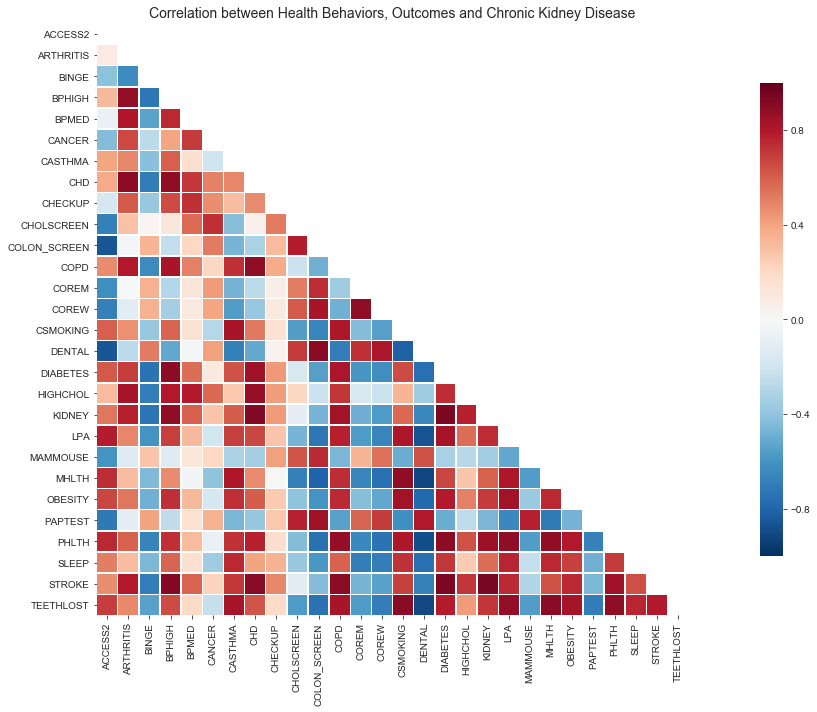

In [18]:
# create a correlation heatmap between CDC variables
# create a correlation map dataframe
corr = prev_cat_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu_r', vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation between Health Behaviors, Outcomes and Chronic Kidney Disease', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('img/corr_behavior.png')

In [19]:
# list the correlation coefficients for chronic kidney disease
corr['KIDNEY']

MeasureId
ACCESS2         0.531547
ARTHRITIS       0.775231
BINGE          -0.728131
BPHIGH          0.882861
BPMED           0.597449
CANCER          0.287189
CASTHMA         0.602813
CHD             0.920849
CHECKUP         0.428527
CHOLSCREEN     -0.097729
COLON_SCREEN   -0.463759
COPD            0.841484
COREM          -0.486565
COREW          -0.567700
CSMOKING        0.575029
DENTAL         -0.656092
DIABETES        0.940892
HIGHCHOL        0.778525
KIDNEY          1.000000
LPA             0.734790
MAMMOUSE       -0.345013
MHLTH           0.587271
OBESITY         0.699891
PAPTEST        -0.460484
PHLTH           0.858292
SLEEP           0.557202
STROKE          0.952590
TEETHLOST       0.718052
Name: KIDNEY, dtype: float64

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


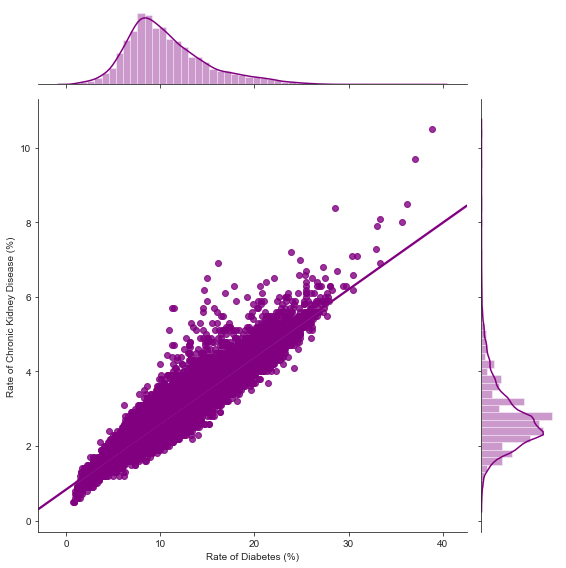

In [20]:
# plot the relationship between diabetes and kidney disease
sns.jointplot(x='DIABETES', y='KIDNEY', height=8, color='purple', 
              kind='reg', data=prev_cat_df)
plt.xlabel('Rate of Diabetes (%)')
plt.ylabel('Rate of Chronic Kidney Disease (%)')
plt.savefig('img/kidney_diabetes.png')

### Looking at the geography of Chronic Kidney Disease

In [21]:
# create a dataframe of the mean kidney disease rate for each state
state_kidney = pivot_df.groupby('StateAbbr', as_index=False)['Chronic kidney disease among adults'].mean()
state_kidney.columns = ['State', 'Rate']

# Load the shape of the US states
state_geo = 'data/shapefiles/states.geojson'

# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=4)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_kidney,
 columns=['State', 'Rate'],
 key_on='feature.properties.STUSPS',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Chronic Kidney Disease Rate (%)'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('kidney_disease_map.html')
m

In [26]:
# create dataframe containing all Hammond and Fishers data
two_cities_tracts = pivot_df[pivot_df.CityName.isin(['Fishers','Gary'])].copy()

# reset index
two_cities_tracts.reset_index(inplace=True, drop=True)

# convert GeoLocation to string
two_cities_tracts.loc[:,'GeoLocation'] = two_cities_tracts.GeoLocation.astype('str').copy()

# split GeoLocation string
two_cities_tracts.loc[:,'GeoLocation'] = two_cities_tracts.GeoLocation.str.lstrip('()').str.rstrip(')').str.split(',').copy()

two_cities_tracts['lat'] = 0.0
two_cities_tracts['lon'] = 0.0

# convert GeoLocation string to latitude and longitude: lat, lon
for idx, row in enumerate(two_cities_tracts.GeoLocation):
    two_cities_tracts['lat'].iloc[idx] = float(two_cities_tracts.GeoLocation.iloc[idx][0])
    two_cities_tracts['lon'].iloc[idx] = float(two_cities_tracts.GeoLocation.iloc[idx][1])
    
# convert longitude and latitude points to GPS Points
points = [Point(xy) for xy in zip(two_cities_tracts['lon'], two_cities_tracts['lat'])]
two_cities_tracts.drop(['GeoLocation'], axis=1, inplace=True)
crs = {'init': 'epsg:4326'}

# create GeoDataFrame with Hammond and Fishers data
two_cities_gdf = gpd.GeoDataFrame(two_cities_tracts, crs=crs, geometry=points)

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
# Create GeoDataFrame from Indiana Census Tract data
indiana_tracts = gpd.read_file('data/shapefiles/cb_2015_18_tract_500k.shx')
indiana_tracts.crs = {'init': 'epsg:4326'}

# create dictionary that maps indiana index to geometry
indiana_dict = {k:v for k,v in enumerate(indiana_tracts.geometry)}

In [27]:
# Spatial join point and polygon shapes 
city_census_tracts = gpd.sjoin(two_cities_gdf, indiana_tracts, how='left')

# rename index_right
city_census_tracts.rename(columns={'geometry':'point','index_right':'geometry'}, inplace=True)

# drop point column
city_census_tracts.drop('point', axis=1, inplace=True)

# map index_right key to Polygon coordinates
for idx,num in enumerate(city_census_tracts.geometry):
    city_census_tracts.geometry[idx] = indiana_dict[num]
    
city_census_tracts.geometry.head()

C:\Users\echri\Anaconda3\envs\springboard\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


0    POLYGON ((-85.975357 39.926858, -85.9702839999...
1    POLYGON ((-85.994997 39.933424, -85.9949989999...
2    POLYGON ((-85.994467 40.00085199999999, -85.98...
3    POLYGON ((-86.016488 39.956772, -86.013679 39....
4    POLYGON ((-85.9941 39.959102, -85.994191 39.96...
Name: geometry, dtype: object

In [28]:
# create dataframes for Gary and Fishers data
gary = city_census_tracts[city_census_tracts.CityName == 'Gary'].copy()
fishers = city_census_tracts[city_census_tracts.CityName == 'Fishers'].copy()

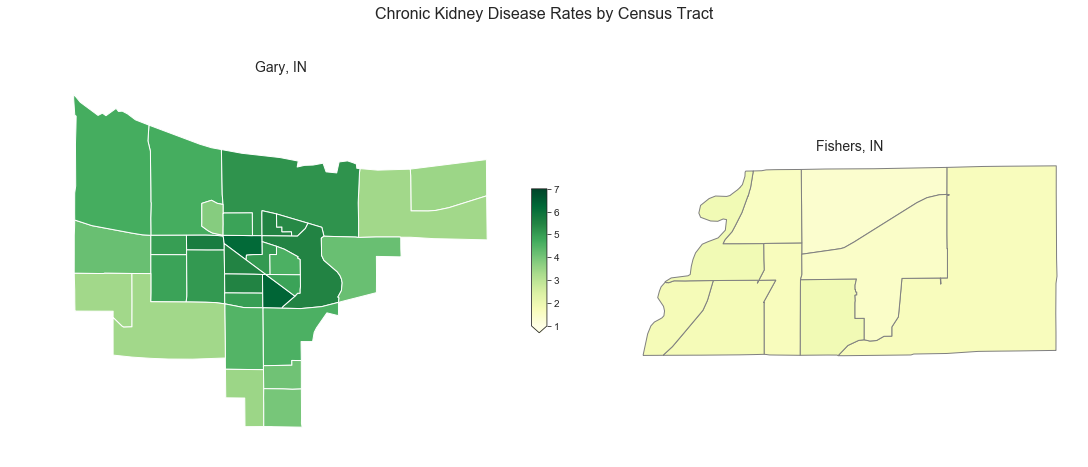

In [29]:
# create choropleth map to show the rates of CKD by census tract
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7), constrained_layout=True)
    
ax1.set_aspect('equal')
gary = gary.to_crs(epsg=3857) # change projection
gary.plot(ax=ax1, column='Chronic kidney disease among adults', cmap='YlGn', legend=False, 
          vmin=1.0, vmax=7.0)
scatter = ax1.collections[0]
plt.colorbar(scatter, ax=ax1, extend='min', shrink=0.3)
ax1.set_title('Gary, IN', fontsize=14)
ax1.set_axis_off()

ax2.set_aspect('equal')
fishers = fishers.to_crs(epsg=3857) # change projection
fishers.plot(ax=ax2, column='Chronic kidney disease among adults', cmap='YlGn', legend=False, 
          vmin=1.0, vmax=7.0, markersize=8, edgecolor='gray')
scatter2 = ax2.collections[0]
plt.axis('off')
ax2.set_title('Fishers, IN', fontsize=14)

fig.suptitle('Chronic Kidney Disease Rates by Census Tract', fontsize=16)
plt.savefig('img/two_cities.png')

In [30]:
# print summary demographic data about Gary and Fishers
g = gary['Chronic kidney disease among adults']
f = fishers['Chronic kidney disease among adults']

print('''Gary''')
print('-'*30)
print('Chronic Kidney Disease Rate:\n  Min: {0}\n  Mean: {1:.1f}\n  Max: {2}'.format(g.min(), g.mean(), g.max()))
print('\nRacial Demographics:\n  % Black: 81.5\n  % White: 13.6\n  % Latino: 5.6\n  % Asian: 0.4')
print('% without health insurance: 18.1')
print('Median household income: $28,895')
print()

print('Fishers')
print('-'*30)
print('Chronic Kidney Disease Rate:\n  Min: {0}\n  Mean: {1}\n  Max: {2}'.format(f.min(), f.mean(), f.max()))
print('\nRacial Demographics:\n  % Black: 5.4\n  % White: 84.5\n  % Latino: 3.8\n  % Asian: 6.6')
print('% without health insurance: 5.0')
print('Median household income: $97,100')

# from U.S. Census Quick Facts

Gary
------------------------------
Chronic Kidney Disease Rate:
  Min: 3.4
  Mean: 4.7
  Max: 6.3

Racial Demographics:
  % Black: 81.5
  % White: 13.6
  % Latino: 5.6
  % Asian: 0.4
% without health insurance: 18.1
Median household income: $28,895

Fishers
------------------------------
Chronic Kidney Disease Rate:
  Min: 1.4
  Mean: 1.7
  Max: 1.9

Racial Demographics:
  % Black: 5.4
  % White: 84.5
  % Latino: 3.8
  % Asian: 6.6
% without health insurance: 5.0
Median household income: $97,100
